In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools


hopping=1


def make_basis(L):
    basis = []
    for s in itertools.product((0,1), repeat=L):
        basis.append(s)
    return basis

In [2]:
def density(state, site):
    return state[site]

def cdag(state,site):
    if state[site]==1:
        return None
    else:
        retstate = list(state)
        retstate[site]=1
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
        
def c(state,site):
    if state[site]==0:
        return None
    else:
        retstate = list(state)
        retstate[site]=0
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
            

def createH(L):
    basis = make_basis(L)
    dim=len(basis)
    H=np.zeros((dim,dim))
    
    for row,s in enumerate(basis):
        diagmatel = 0.0
        for i in range(L):
            diagmatel+= density(s,i)*density(s,(i+1)%L)
        H[row,row]=diagmatel
        
        for i in range(L):
            ret = c(s,(i+1)%L)
            if ret!=None:
                s2,sign = ret
                
                ret2 = cdag(s2,i)
                if ret2!=None:
                    s3,sign2=ret2
                    
                    col=basis.index(s3)
                    H[row,col]=sign*sign2*hopping
                    H[col,row]=sign*sign2*hopping
    return H
        
        

In [3]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, -1
    else:
        return state2, 1

In [4]:
L = 4

testindex = 9

print(make_basis(L)[testindex])
print(translate(make_basis(L)[testindex])[0])
print(translate(make_basis(L)[testindex])[1])

(1, 0, 0, 1)
(0, 0, 1, 1)
-1


In [5]:
import itertools as it

def translateOp(statei, statej, params = None):
    if np.all(np.equal(statei,translate(statej)[0])):
        return translate(statej)[1]
    else:
        return 0

def genMatrix(operator, basis):
    Matrix = np.empty((len(basis), len(basis)))
    for i, j in it.product(range(len(basis)), repeat=2):
        Matrix[i,j] = operator(basis[i],basis[j])
    return Matrix

In [6]:
print(genMatrix(translateOp,make_basis(L)))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. 

In [7]:
print(np.matmul(genMatrix(translateOp,make_basis(L)),createH(L)) - np.matmul(createH(L),genMatrix(translateOp,make_basis(L))))
print(np.matmul(np.transpose(genMatrix(translateOp,make_basis(L))),genMatrix(translateOp,make_basis(L))))


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0

In [8]:
print(np.matmul(np.transpose(genMatrix(translateOp,make_basis(L))),np.matmul(genMatrix(translateOp,make_basis(L)),createH(L))))
print(createH(L))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  2.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  2. 

[ 1. -1.  1. -1.]


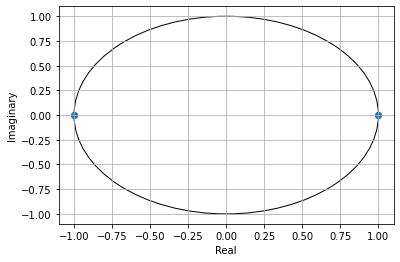

In [9]:
import matplotlib.pyplot as plt

L = 2

print(np.linalg.eigvals(genMatrix(translateOp,make_basis(L))))

x = [z.real for z in np.linalg.eigvals(genMatrix(translateOp,make_basis(L)))]
y = [z.imag for z in np.linalg.eigvals(genMatrix(translateOp,make_basis(L)))]

circle = plt.Circle((0, 0), 1, color='k',fill = False)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()

fig.show()

In [10]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, 1 # neglet the sign
    else:
        return state2, 1

In [11]:
import sympy
sympy.Matrix(np.matmul(genMatrix(translateOp,make_basis(L)),createH(L)) - np.matmul(createH(L),genMatrix(translateOp,make_basis(L))))


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [12]:
def translate(state):
    state2 = tuple(list(state[1:])+[state[0]])
    parity = sum(state[1:])
    if state[0]==1 and parity%2!=0:
        return state2, -1
    else:
        return state2, 1

## Exercise 11



In [13]:
def make_spin_basis(L):
    basis = []
    for s in itertools.product((0,1), repeat=2*L):
        basis.append(s)
    return basis

In [14]:
L = 4

make_spin_basis(L)

[(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 0, 1, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0, 1, 0, 0),
 

In [15]:
def spin_density(state, site):
    return (state[site] - 0.5)

def cdag(state,site):
    if state[site]==1:
        return None
    else:
        retstate = list(state)
        retstate[site]=1
        retstate=tuple(retstate)
        nSpinfermions = sum(state[:site])
        
        if nSpinfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)

def c(state,site):
    if state[site]==0:
        return None
    else:
        retstate = list(state)
        retstate[site]=0
        retstate=tuple(retstate)
        nfermions = sum(state[:site])
        
        if nfermions%2==0:
            return (retstate, 1)
        else:
            return (retstate, -1)
        

def create_spin_H(L):
    basis = make_spin_basis(L) #returns basis which state is 2*L long
    dim=len(basis)
    H=np.zeros((dim,dim))
    
    for row,s in enumerate(basis):
        diagmatel = 0.0
        for i in range(L*2):
            diagmatel+= spin_density(s,2*i)*spin_density(s,(2*i+1)%(L*2))
        H[row,row]=diagmatel
        
        for i in range((L*2)):
            ret = c(s,(i+1)%L)
            if ret!=None:
                s2,sign = ret
                
                ret2 = cdag(s2,i)
                if ret2!=None:
                    s3,sign2=ret2
                    
                    col=basis.index(s3)
                    H[row,col]=sign*sign2*hopping
                    H[col,row]=sign*sign2*hopping
    return H
        

In [16]:
import itertools as it
import numpy as np

def genBasis(L): #L number of fermions
    tmp = it.product([0,1], repeat = 2*L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

In [22]:
L = 1

print(genBasis(L))

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [18]:
def spin_density(state, site):
    return (state[site] - 0.5)

def c(state, coef, site): #state is copy
    if (state[site] == 0):
        return np.zeros(len(state)), 0
    else:
        state[site] = 0
        if (np.sum(state[:site])%2 == 0):
            return state , 1
        else:
            return state , -1
    
def cdag(state, coef, site):
    if (state[site] == 1):
        return np.zeros(len(state)), 0
    else:
        state[site] = 1
        if (np.sum(state[:site])%2 == 0):
            return state , 1*coef
        else:
            return state , -1*coef

def hubbardHamiltonian(statei,statej, L,t,U): #spin up at even indicies spin down at odd
    hDiag = 0
    if ((np.array_equal(statei,statej))):
        hDiag = U * np.sum([spin_density(statei, 2*i)*spin_density(statei, (2*i +1)%(2*L)) for i in range(L)])
    hOfdiag = 0
    for s in range(L):
        for sigm in [0,1]:
            state1, coef1 = cdag(*c(np.copy(statei),1,2*s + sigm),(2*(s+1) + sigm)%(2*L))
            state2, coef2 = c(*cdag(np.copy(statei),1,2*s + sigm),(2*(s+1) + sigm)%(2*L))
            if np.array_equal(state1, statej):
                hOfdiag += coef1 * (-t)
            if np.array_equal(state2, statej):
                hOfdiag += coef2 * (-t)
    return hDiag + hOfdiag

def calcMatrix(Basis, L, t,U):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i, j in it.product(range(len(Basis)), repeat=2):
        Matrix[i,j] = hubbardHamiltonian(Basis[i], Basis[j], L, t, U)
    return Matrix

In [19]:
testindex = 4

a = genBasis(L)
print(c(np.copy(a[testindex]), 1,1))
print(a[testindex])

(array([0, 0, 0, 0]), 1)
[0 1 0 0]


In [20]:
print(hubbardHamiltonian(a[testindex],a[testindex],L,1,1))

print(hubbardHamiltonian(a[testindex],a[testindex + 4],L,1,1))

0.0
0


In [23]:
import sympy
sympy.Matrix(calcMatrix(genBasis(L),L,1,1))

Matrix([
[-1.75,     0,     0,     0],
[    0, -2.25,     0,     0],
[    0,     0, -0.25,     0],
[    0,     0,     0, -1.75]])